<a href="https://www.kaggle.com/code/mohamedabdelaziz187/california-housing-prices-eda-preprocess-ml-dl?scriptVersionId=128796133" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Clifornia Housing Price**

### *Table of contents*
<ol>
    <li><a href=\"#imports\">Import libraries and the data</a></li>    
    <li><a href=\"#explore\">Explore the data (EDA)</a></li>    
    <li><a href=\"#pros\">Preprocess the data</a></li>
    <li><a href=\"#ml\">Machine Learning Regression models</a></li>    
    <li><a href=\"#nn\">Deep Neural Network Regression model</a></li>



</ol>

<a id='imports'></a>
## 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

<a id='explore'></a>
## 2. Explore the data

In [3]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
columns = df.columns
types = list()
counts = list()
unique = list()
ranges = list()
nulls = list()
nulls_per = list()

for column in columns:
    types.append(df[column].dtype)   
    counts.append(df[column].shape[0])
    unique.append(df[column].nunique()) 
    ranges.append((np.min(df[column]),np.max(df[column])))
    nulls.append(df[column].isnull().sum())
    nulls_per.append(nulls[-1]/counts[-1])
    
pd.DataFrame({'Column':columns, 'Data_type':types, 'len':counts, '#Unique_values':unique, 'Range':ranges, '#Nulls':nulls, 'Nulls_percentage': nulls_per})

    

Column Data_type    len  #Unique_values  \
0           longitude   float64  20640             844   
1            latitude   float64  20640             862   
2  housing_median_age   float64  20640              52   
3         total_rooms   float64  20640            5926   
4      total_bedrooms   float64  20640            1923   
5          population   float64  20640            3888   
6          households   float64  20640            1815   
7       median_income   float64  20640           12928   
8  median_house_value   float64  20640            3842   
9     ocean_proximity    object  20640               5   

                     Range  #Nulls  Nulls_percentage  
0       (-124.35, -114.31)       0          0.000000  
1           (32.54, 41.95)       0          0.000000  
2              (1.0, 52.0)       0          0.000000  
3           (2.0, 39320.0)       0          0.000000  
4            (1.0, 6445.0)     207          0.010029  
5           (3.0, 35682.0)       0          0.000000  
6            (1.0, 6082.0)       0          0.000000  
7        (0.4999, 15.0001)       0          0.000000  
8      (14999.0, 500001.0)       0          0.000000  
9  (<1H OCEAN, NEAR OCEAN)       0          0.000000

In [5]:
for column in df:
    print(f'the {column} column:')
    print(f'   column dtype: {df[column].dtype}')
    print(f'   column length {len(df[column])} ::: with {df[column].isnull().sum()} null values')
    print(f'   ten unique values in that column or less {np.unique(df[column])[:10]}')
    print('--'*10, '\n')
    
# use ratio for null values .

the longitude column:
   column dtype: float64
   column length 20640 ::: with 0 null values
   ten unique values in that column or less [-124.35 -124.3  -124.27 -124.26 -124.25 -124.23 -124.22 -124.21 -124.19
 -124.18]
-------------------- 

the latitude column:
   column dtype: float64
   column length 20640 ::: with 0 null values
   ten unique values in that column or less [32.54 32.55 32.56 32.57 32.58 32.59 32.6  32.61 32.62 32.63]
-------------------- 

the housing_median_age column:
   column dtype: float64
   column length 20640 ::: with 0 null values
   ten unique values in that column or less [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
-------------------- 

the total_rooms column:
   column dtype: float64
   column length 20640 ::: with 0 null values
   ten unique values in that column or less [ 2.  6.  8. 11. 12. 15. 16. 18. 19. 20.]
-------------------- 

the total_bedrooms column:
   column dtype: float64
   column length 20640 ::: with 207 null values
   ten unique values 

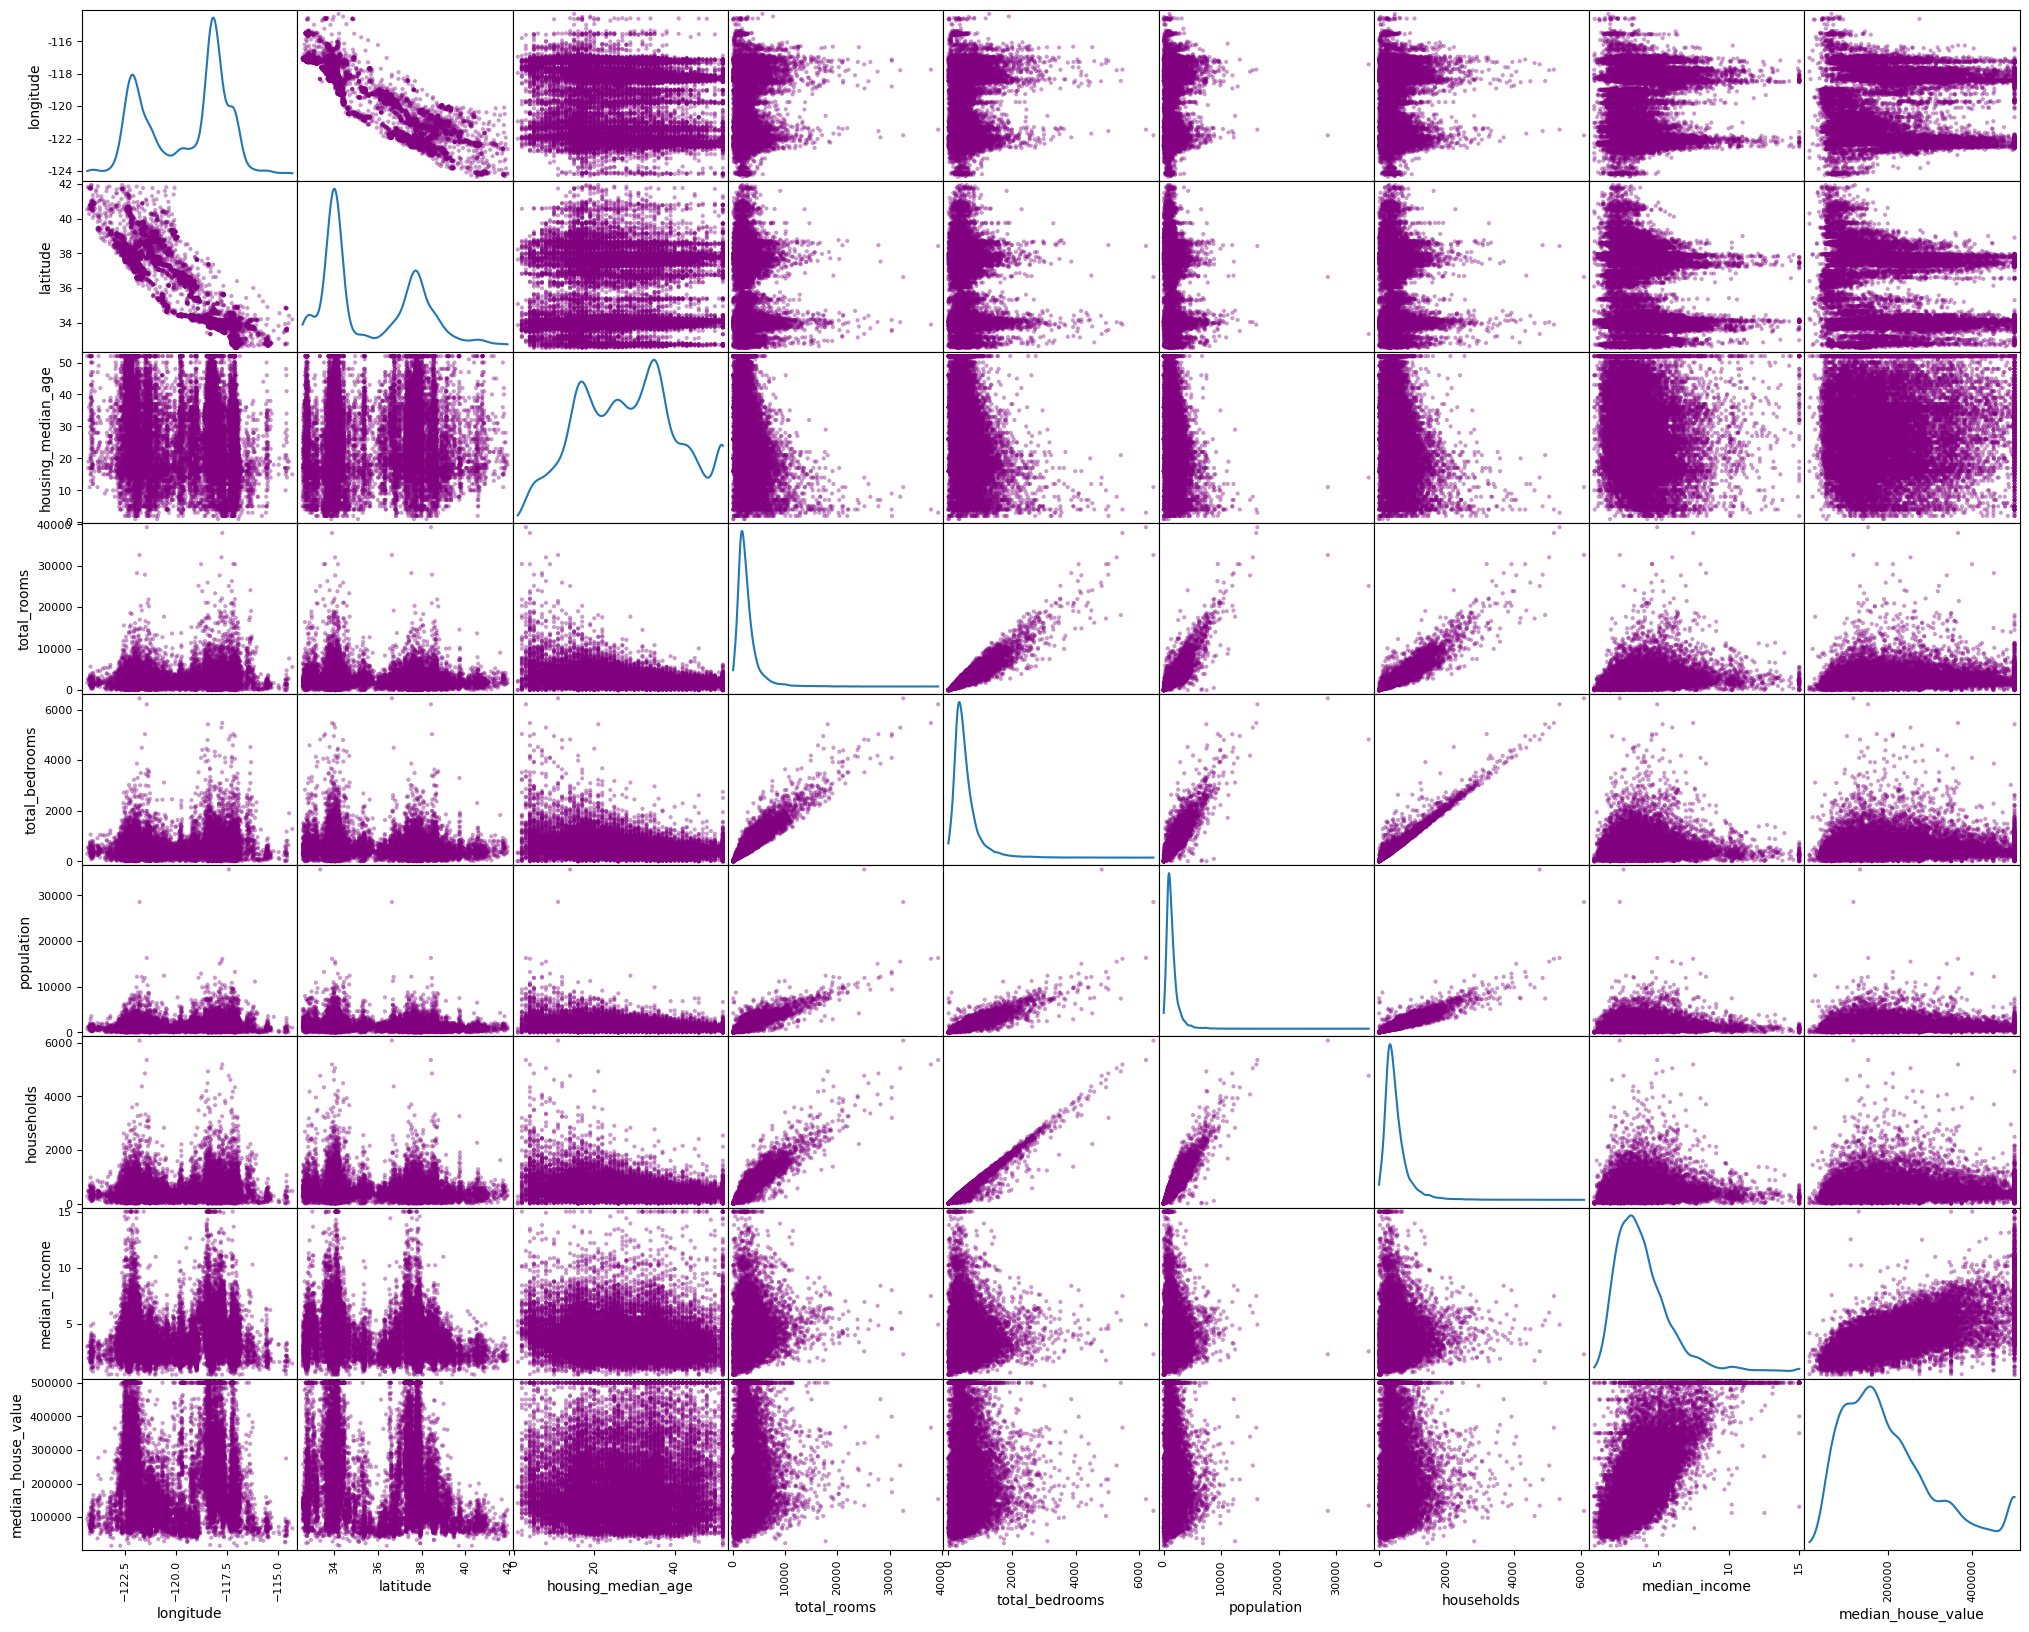

In [6]:
# ax = df.hist( bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

ax = pd.plotting.scatter_matrix(df, alpha=0.4,grid=False,diagonal='kde', figsize=(25,20), color = 'purple' )

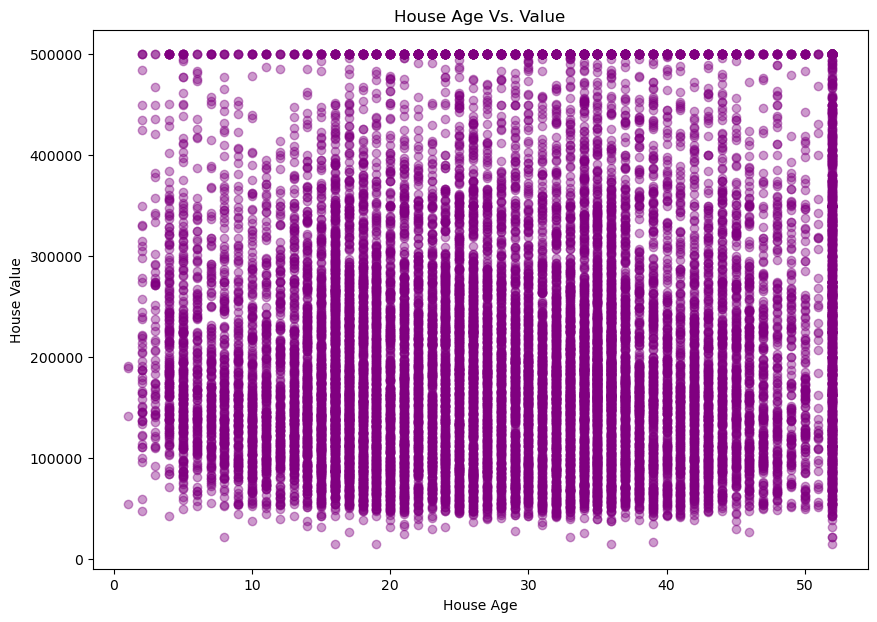

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(df.housing_median_age, df.median_house_value , color = 'purple', alpha = 0.4)
plt.xlabel('House Age')
plt.ylabel('House Value')
plt.title('House Age Vs. Value')
plt.show()

In [8]:

fig = px.scatter(df, x='housing_median_age', y='median_house_value', 
                 title='House Age Vs. Value', 
                 labels={'housing_median_age': 'House Age', 'median_house_value': 'House Value'})
fig.show()


In [9]:
fig = px.scatter(df, x='total_rooms', y='median_house_value', 
                 title='House Total rooms Vs. Value', 
                 labels={'total_rooms': 'House Total rooms', 'median_house_value': 'House Value'})
fig.show()

In [10]:
df.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [11]:
fig = px.scatter(df, x='total_bedrooms', y='median_house_value', 
                 title='House Total bed rooms Vs. Value', 
                 labels={'total_bedrooms': 'House Total bed rooms', 'median_house_value': 'House Value'})
fig.show()

In [12]:
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [13]:
dependents = df.population / df.households

px.scatter(dependents, df.median_income,
          title='# of dependents Vs. income', 
                 labels={'dependents': '#dependents', 'median_income': 'Income'})


In [14]:
import plotly.graph_objs as go

fig = go.Figure(go.Scattermapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='rgb(0, 255, 0)',
            opacity=0.7
        )
    ))
fig.update_layout(mapbox_style='open-street-map')

fig.show()


In [15]:
# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)

# Update the map style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

<a id='pros'></a>
## 3. Preprocess the data

In [16]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
df = df.dropna(axis = 0)

In [19]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [21]:
# log transformation 
t = 9e-1
df['total_rooms'] = np.log(df['total_rooms'] + t)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + t)
df['population']  = np.log(df['population'] +t)
df['households'] = np.log(df['households'] + t)
df['total_rooms'] = np.log(df['total_rooms'] + t)

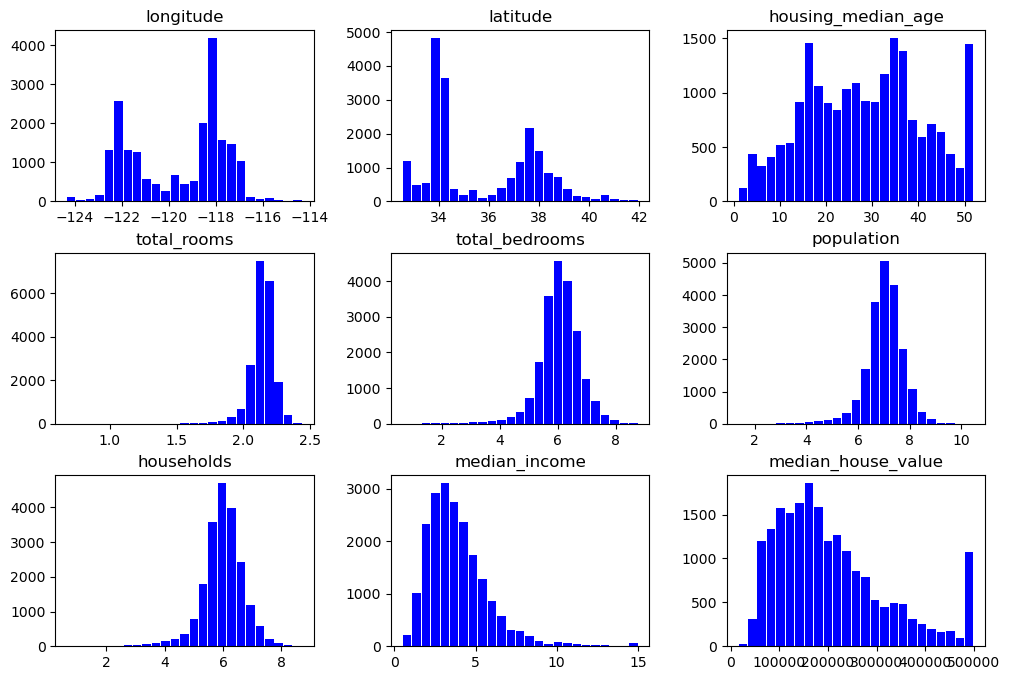

In [22]:
ax = df.hist( bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

In [23]:
# standard scaler
for column in df.drop(columns=['ocean_proximity','median_house_value' ]).columns:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])

In [24]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  2.043300e+04  2.043300e+04        2.043300e+04  2.043300e+04   
mean  -8.457103e-16  1.535632e-15        5.007495e-17 -4.502573e-15   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.385447e+00 -1.447937e+00       -2.194584e+00 -1.528327e+01   
25%   -1.112692e+00 -7.972780e-01       -8.444662e-01 -3.919710e-01   
50%    5.393926e-01 -6.428050e-01        2.913923e-02  8.570167e-02   
75%    7.789699e-01  9.768213e-01        6.644886e-01  5.510779e-01   
max    2.625711e+00  2.956885e+00        1.855769e+00  3.146002e+00   

       total_bedrooms    population    households  median_income  \
count    2.043300e+04  2.043300e+04  2.043300e+04   2.043300e+04   
mean     1.989088e-16 -6.189821e-16 -5.063134e-16   2.948858e-16   
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min     -7.442144e+00 -7.690004e+00 -7.344037e+00  -1.775054e+00   
25%     -4.963099e-01 -4.828128e-01 -4.758586e-01  -6.884113e-01   
50%      3.171148e-02  5.040197e-02  4.365885e-02  -1.762077e-01   
75%      5.766535e-01  5.794398e-01  5.786216e-01   4.595713e-01   
max      3.735649e+00  4.694161e+00  3.751658e+00   5.859665e+00   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [25]:
df = pd.get_dummies(df)

In [26]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X = np.array(df.drop(columns = ['median_house_value']).values)
Y = np.array(df.median_house_value.values)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=25)

# drop first

In [28]:
X_train.shape, Y_test.shape

((18389, 13), (2044,))

<a id='ml'></a>
## 4. Machine Learning Regression models

In [29]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


models = [LinearRegression(), ElasticNet(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
scores = list()

for model in models:
    model.fit(X_train, Y_train)
    yPred = model.predict(X_test)
    scores.append(r2_score(Y_test, yPred))

In [30]:
results = pd.DataFrame({'Model': models, 'R2_Score': scores})

In [31]:
results

Model  R2_Score
0                                 LinearRegression()  0.674075
1                                       ElasticNet()  0.544038
2                                            Lasso()  0.674055
3                                            Ridge()  0.673967
4                            DecisionTreeRegressor()  0.703212
5  (DecisionTreeRegressor(max_features='auto', ra...  0.826793
6                                              SVR() -0.059917

<a id='nn'></a>
## 5. Deep Neural Network Regression model

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(64, activation='relu'),                    
                    Dense(32, activation='relu'),                   
                    Dense(16, activation='relu'),
                    Dense(1)
                    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['acc', 'mean_absolute_error'])

In [34]:
results = model.fit(X_train, Y_train,
          validation_split=0.2, 
          epochs=350, 
          batch_size=16, 
          verbose=0
         )


In [35]:
mse, acc, mae = model.evaluate(X_test, Y_test)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

64/64 [==============================] - 0s 2ms/step - loss: 2999318016.0000 - acc: 0.0000e+00 - mean_absolute_error: 35363.2109
Mean Squared Error:  2999318016.0
Mean Absolute Error:  35363.2109375


In [36]:
yPred = model.predict(X_test)
r2_score(Y_test, yPred)

64/64 [==============================] - 0s 1ms/step


0.77834586747824

In [37]:
Y_test[:5], yPred[:5]

(array([500001., 189800., 350000., 153500., 255400.]),
 array([[534192.75],
        [238652.47],
        [144961.4 ],
        [148264.95],
        [306404.16]], dtype=float32))

In [38]:
train_mse = results.history['loss']
val_mse = results.history['val_loss']
train_mae = results.history['mean_absolute_error']
val_mae = results.history['val_mean_absolute_error']


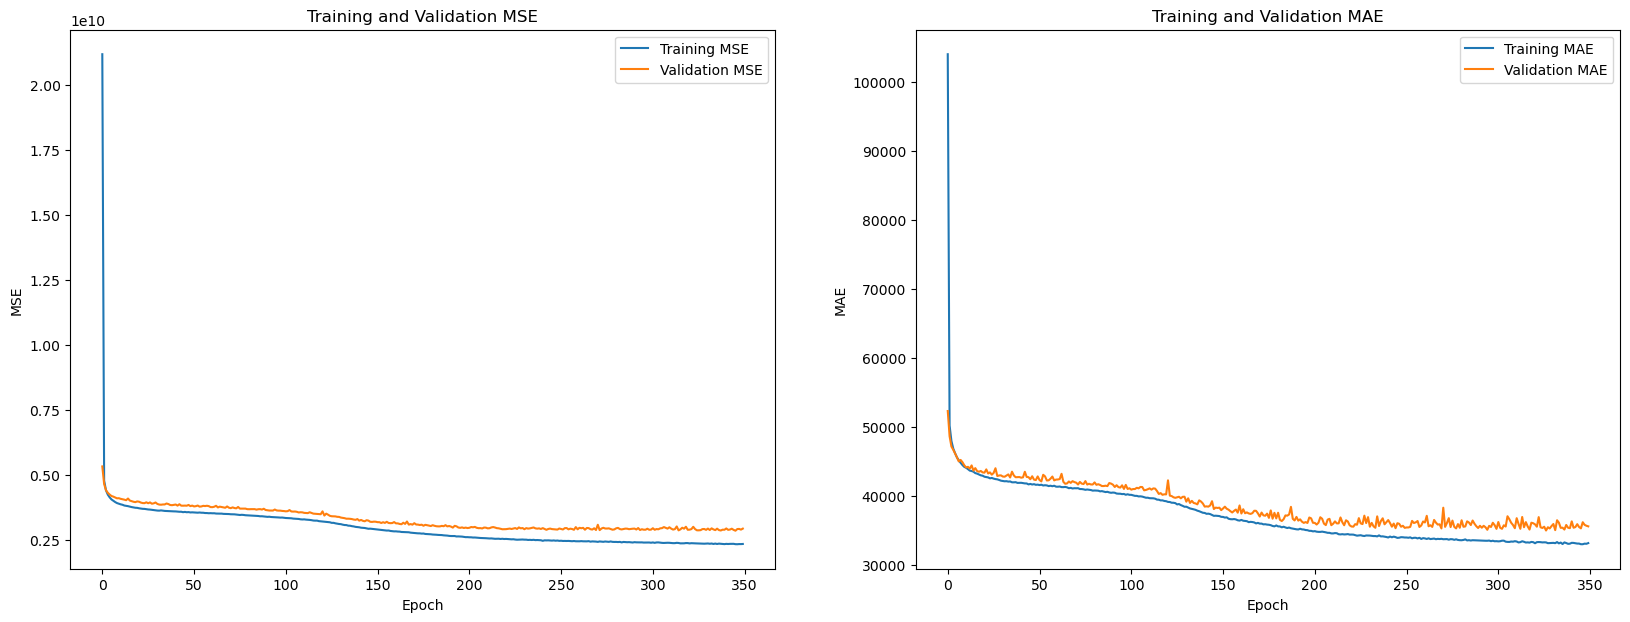

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Plot the training and validation curves for the mean squared error
ax1.plot(train_mse, label='Training MSE')
ax1.plot(val_mse, label='Validation MSE')
ax1.set_title('Training and Validation MSE')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax1.legend()

# Plot the training and validation curves for the mean absolute error
ax2.plot(train_mae, label='Training MAE')
ax2.plot(val_mae, label='Validation MAE')
ax2.set_title('Training and Validation MAE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend()

# Show the figure
plt.show()